# Results Summary

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
results_fm = pd.read_pickle("outputs/results_fm.pkl")
results_fm

,RMSE,Loss,Model,t
0,3.707487,MSE,XGB,2023-05-17 02:22:00
1,3.406206,MSE,XGB,2023-05-19 02:22:00
2,2.745277,MSE,XGB,2023-05-21 02:22:00
3,3.216820,MSE,XGB,2023-05-23 02:22:00
4,3.852213,MSE,XGB,2023-05-25 02:22:00
...,...,...,...,...
162,4.692986,ROS,RF,2024-04-05 02:22:00
163,4.508953,ROS,RF,2024-04-07 02:22:00
164,4.540855,ROS,RF,2024-04-09 02:22:00
165,4.974576,ROS,RF,2024-04-11 02:22:00


In [3]:
results_ros = pd.read_pickle("outputs/results_ros.pkl")
results_ros

,RMSE,Loss,Model,t
0,0.000446,MSE,XGB,2023-05-17 02:22:00
1,0.000433,MSE,XGB,2023-05-19 02:22:00
2,0.000398,MSE,XGB,2023-05-21 02:22:00
3,0.000446,MSE,XGB,2023-05-23 02:22:00
4,0.000537,MSE,XGB,2023-05-25 02:22:00
...,...,...,...,...
162,0.000557,ROS,RF,2024-04-05 02:22:00
163,0.000540,ROS,RF,2024-04-07 02:22:00
164,0.000655,ROS,RF,2024-04-09 02:22:00
165,0.000613,ROS,RF,2024-04-11 02:22:00


In [4]:
# Note, 167*3*12=6012
print(f"Total Time Periods: {len(results_ros.t.unique())}")
print(f"Earliest Train Start Time: {results_ros.t.min()}")
print(f"Latest Train Start Time: {results_ros.t.max()}")
print(f"Total Loss Functions: {len(results_ros.Loss.unique())}")
print(f"Total Models: {len(results_ros.Model.unique())}")
print(f"Total RMSE Calculations: {results_ros.shape[0]}")

Total Time Periods: 167
Earliest Train Start Time: 2023-05-17 02:22:00
Latest Train Start Time: 2024-04-13 02:22:00
Total Loss Functions: 12
Total Models: 3
Total RMSE Calculations: 6012


In [5]:
tab1 = results_ros.groupby('Loss', sort=False)['RMSE'].mean().reset_index()
tab1.rename(columns={'RMSE': 'Mean'})

,Loss,Mean
0,MSE,0.000558
1,exp_0.01,0.000558
2,exp_0.0367,0.000556
3,exp_0.0633,0.000558
4,exp_0.09,0.000563
5,exp_0.1167,0.000570
6,exp_0.1433,0.000580
7,exp_0.17,0.000593
8,exp_0.1967,0.000608
9,exp_0.2233,0.000624


In [6]:
pd.options.display.float_format = '{:.3e}'.format

In [7]:
tab1 = results_ros.groupby('Loss', sort=False).agg(
    Mean=('RMSE', 'mean'),
    Min=('RMSE', 'min'),
    Max=('RMSE', 'max')
).reset_index()
tab1

,Loss,Mean,Min,Max
0,MSE,5.584e-04,2.137e-04,1.932e-03
1,exp_0.01,5.580e-04,2.080e-04,1.806e-03
2,exp_0.0367,5.562e-04,2.087e-04,1.536e-03
3,exp_0.0633,5.580e-04,2.057e-04,1.344e-03
4,exp_0.09,5.633e-04,2.047e-04,1.223e-03
5,exp_0.1167,5.700e-04,1.952e-04,1.250e-03
6,exp_0.1433,5.804e-04,2.013e-04,1.298e-03
7,exp_0.17,5.928e-04,2.021e-04,1.340e-03
8,exp_0.1967,6.077e-04,1.998e-04,1.378e-03
9,exp_0.2233,6.241e-04,1.943e-04,1.411e-03


In [8]:
print(tab1.to_latex(float_format='%.3e'))

\begin{tabular}{llrrr}
\toprule
 & Loss & Mean & Min & Max \\
\midrule
0 & MSE & 5.584e-04 & 2.137e-04 & 1.932e-03 \\
1 & exp_0.01 & 5.580e-04 & 2.080e-04 & 1.806e-03 \\
2 & exp_0.0367 & 5.562e-04 & 2.087e-04 & 1.536e-03 \\
3 & exp_0.0633 & 5.580e-04 & 2.057e-04 & 1.344e-03 \\
4 & exp_0.09 & 5.633e-04 & 2.047e-04 & 1.223e-03 \\
5 & exp_0.1167 & 5.700e-04 & 1.952e-04 & 1.250e-03 \\
6 & exp_0.1433 & 5.804e-04 & 2.013e-04 & 1.298e-03 \\
7 & exp_0.17 & 5.928e-04 & 2.021e-04 & 1.340e-03 \\
8 & exp_0.1967 & 6.077e-04 & 1.998e-04 & 1.378e-03 \\
9 & exp_0.2233 & 6.241e-04 & 1.943e-04 & 1.411e-03 \\
10 & exp_0.25 & 6.420e-04 & 1.974e-04 & 1.440e-03 \\
11 & ROS & 5.561e-04 & 2.154e-04 & 1.196e-03 \\
\bottomrule
\end{tabular}



In [9]:
min_ros = tab1.Mean.argmin()
print(tab1.Loss[min_ros])
(tab1.Mean[0] - tab1.Mean[min_ros]) / tab1.Mean[0]

ROS


0.0040482739285681345

In [10]:
pd.options.display.float_format = None

In [11]:
tab2 = results_fm.groupby('Loss', sort=False).agg(
    Mean=('RMSE', 'mean'),
    Min=('RMSE', 'min'),
    Max=('RMSE', 'max')
).reset_index()
tab2.round(2)

,Loss,Mean,Min,Max
0,MSE,3.99,1.70,8.32
1,exp_0.01,3.99,1.65,8.42
2,exp_0.0367,4.01,1.56,8.69
3,exp_0.0633,4.06,1.53,8.95
4,exp_0.09,4.15,1.50,9.55
5,exp_0.1167,4.25,1.48,10.06
6,exp_0.1433,4.38,1.40,10.49
7,exp_0.17,4.52,1.33,10.84
8,exp_0.1967,4.68,1.34,11.14
9,exp_0.2233,4.85,1.29,11.37


In [12]:
#print(tab2.to_latex())

## Significance Tests

### 2-Sample T-Test

Assumes indenpdent samples.

In [13]:
from scipy import stats
stats.ttest_ind(results_ros[results_ros.Loss == "MSE"].RMSE, results_ros[results_ros.Loss == "exp_0.0367"].RMSE)

TtestResult(statistic=0.21295302737875574, pvalue=0.8314070041657918, df=1000.0)

In [14]:
stats.ttest_ind(results_fm[results_fm.Loss == "MSE"].RMSE, results_fm[results_fm.Loss == "exp_0.0367"].RMSE)

TtestResult(statistic=-0.2756377339929413, pvalue=0.7828832707518565, df=1000.0)

## Paired T-Test

Calculates t-test for related samples.

In [15]:
# Check that time periods match, should be 1
np.mean(results_ros[results_ros.Loss == "MSE"].t == results_fm[results_ros.Loss == "exp_0.0367"].t)

1.0

In [16]:
stats.ttest_rel(results_ros[results_ros.Loss == "MSE"].RMSE, results_ros[results_ros.Loss == "exp_0.0367"].RMSE)

TtestResult(statistic=1.5275369362759237, pvalue=0.12725987558812077, df=500)

In [17]:
stats.ttest_rel(results_fm[results_fm.Loss == "MSE"].RMSE, results_fm[results_fm.Loss == "exp_0.0367"].RMSE)

TtestResult(statistic=-1.9401326868747322, pvalue=0.05292545512050092, df=500)

## Plots

In [18]:
# grouped = results_ros.groupby('Loss').agg({'RMSE': ['mean', 'sem']}).reset_index()
# grouped

grouped = results_fm.groupby('Loss', sort=False).agg(
    Mean=('RMSE', 'mean'),
    SE=('RMSE', 'sem')
).reset_index()
grouped2 = results_ros.groupby('Loss', sort=False).agg(
    Mean=('RMSE', 'mean'),
    SE=('RMSE', 'sem')
).reset_index()

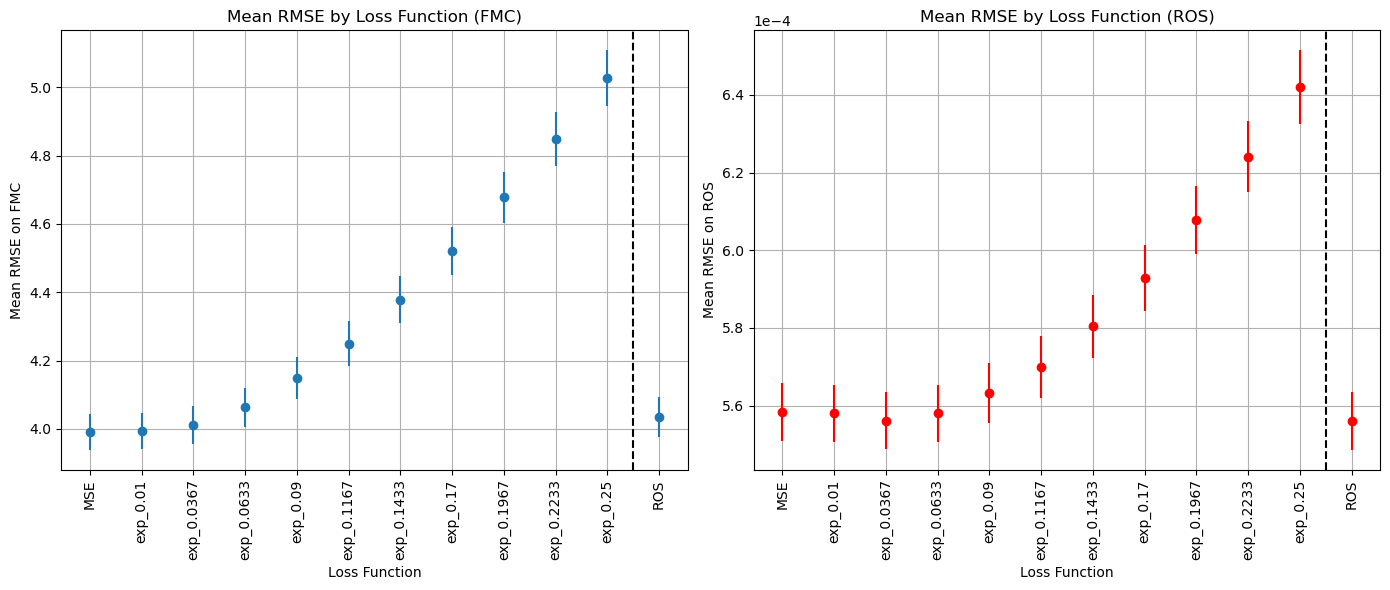

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
ax1 = axes[0]
ax1.errorbar(grouped.Loss, grouped.Mean, yerr=grouped.SE, fmt='o', label='SE')
# plt.errorbar(tab1.Loss, tab1.Mean, yerr=[tab1.Mean[i] - tab1.Max[i] for i in range(len(tab1.Loss))], fmt='o', label='Min')
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax1.set_xlabel('Loss Function')
ax1.set_ylabel('Mean RMSE on FMC')
ax1.set_title('Mean RMSE by Loss Function (FMC)')
ax1.tick_params(axis='x', rotation=90)
ax1.axvline(x=10.5, color='black', linestyle='--')
ax1.grid()

ax2 = axes[1]
ax2.errorbar(grouped2.Loss, grouped2.Mean, yerr=grouped2.SE, fmt='o', label='SE', color='r')
# plt.errorbar(tab1.Loss, tab1.Mean, yerr=[tab1.Mean[i] - tab1.Max[i] for i in range(len(tab1.Loss))], fmt='o', label='Min')
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax2.set_xlabel('Loss Function')
ax2.set_ylabel('Mean RMSE on ROS')
ax2.set_title('Mean RMSE by Loss Function (ROS)')
ax2.tick_params(axis='x', rotation=90)
ax2.axvline(x=10.5, color='black', linestyle='--')
ax2.grid()

plt.tight_layout()
plt.savefig('outputs/results1.png')
plt.show()

In [20]:
models_vec = results_ros.Model.unique()

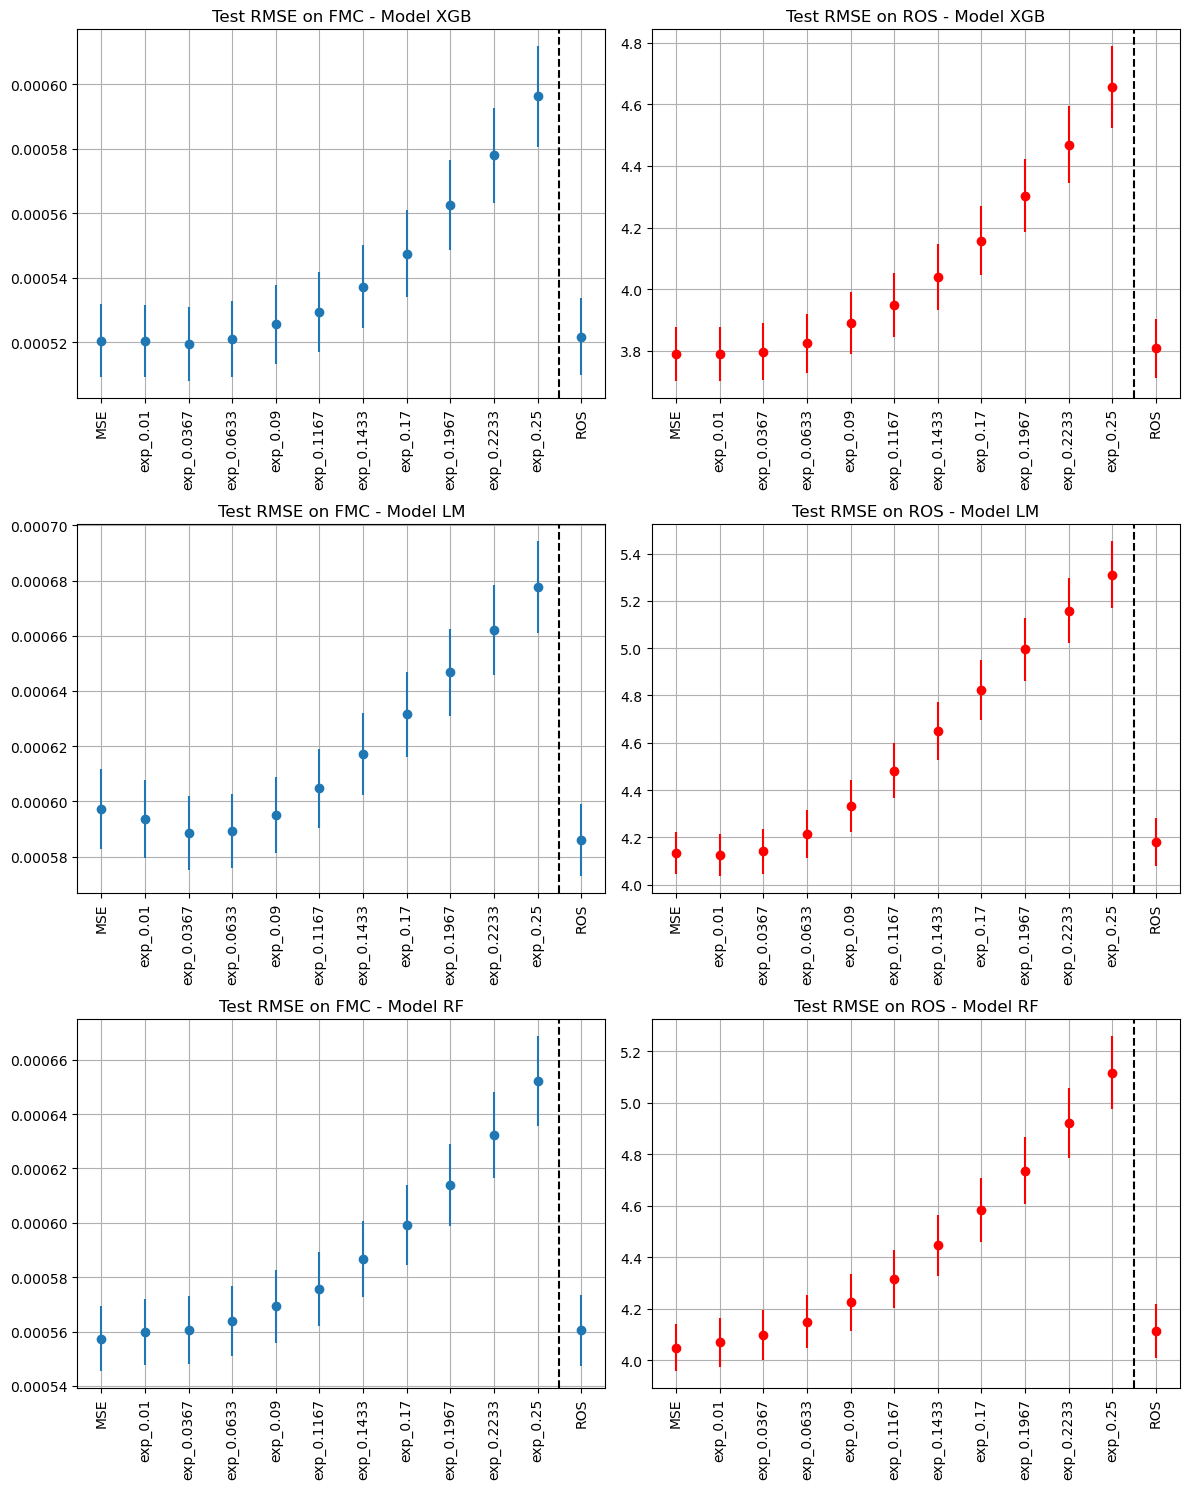

In [21]:
N = len(models_vec) # number of rows of subplots
fig, axes = plt.subplots(N, 2, figsize=(12, 5*N))

for i in range(0, len(models_vec)):
    mod = models_vec[i]
    temp = results_ros[results_ros.Model == mod]
    temp2 = temp.groupby('Loss', sort=False).agg(
        Mean=('RMSE', 'mean'),
        SE=('RMSE', 'sem')
    ).reset_index()
    # Access the subplot at row i, column 0
    ax1 = axes[i, 0]
    # ax1.scatter(temp2.Loss, temp2.Mean)
    ax1.errorbar(temp2.Loss, temp2.Mean, yerr=temp2.SE, fmt='o', label='SE')
    ax1.tick_params(axis='x', rotation=90)
    ax1.set_title(f'Test RMSE on FMC - Model {mod}')
    ax1.axvline(x=10.5, color='black', linestyle='--')
    ax1.grid()

    temp = results_fm[results_fm.Model == mod]
    temp2 = temp.groupby('Loss', sort=False).agg(
        Mean=('RMSE', 'mean'),
        SE=('RMSE', 'sem')
    ).reset_index()
    # Access the subplot at row i, column 0
    ax2 = axes[i, 1]
    ax2.errorbar(temp2.Loss, temp2.Mean, yerr=temp2.SE, fmt='o', label='SE', color='r')
    ax2.tick_params(axis='x', rotation=90)
    ax2.set_title(f'Test RMSE on ROS - Model {mod}')
    ax2.axvline(x=10.5, color='black', linestyle='--')
    ax2.grid()

plt.tight_layout()
plt.savefig('outputs/results2.png')
plt.show()